In [1]:
# Basic librairies (all the librairies used for the machine learning are imported in the tools.py file)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pmdarima as pm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ardl import ARDL
from pmdarima.preprocessing import BoxCoxEndogTransformer
from pmdarima.pipeline import Pipeline

from warnings import filterwarnings

from pmdarima.utils import tsdisplay
filterwarnings('ignore')

In [2]:
# Import all functions we build to process our predictions. All the functions are in the DreamLib folder
from DreamLib.processing_datas import *
from DreamLib.timeseries import *
import datas.selected_columns as cl

In [3]:
# Data importation
data = pd.read_sas("datas/total_red.sas7bdat")
# Useful to plot the model 
index = data.set_index('TRIMESTRE').index.unique()

# Functions

# Focus on chronique total

Then for chronique totale we will build and plot all models for each type of features selection.

In [4]:
start = 1
chronique = b"Totale"
period = 24

## With col_totale_corr

For the correlation feature selection we clean the data, build and find the best ARIMA model.

In [5]:
X_train, X_test, y_train, y_test, X_validation = clean_data(data,start, period=period, chronique=chronique,col_used=cl.col_totale_corr,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y_diff2: -3.207
P-value for the series y_diff2: 0.01961
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 2.



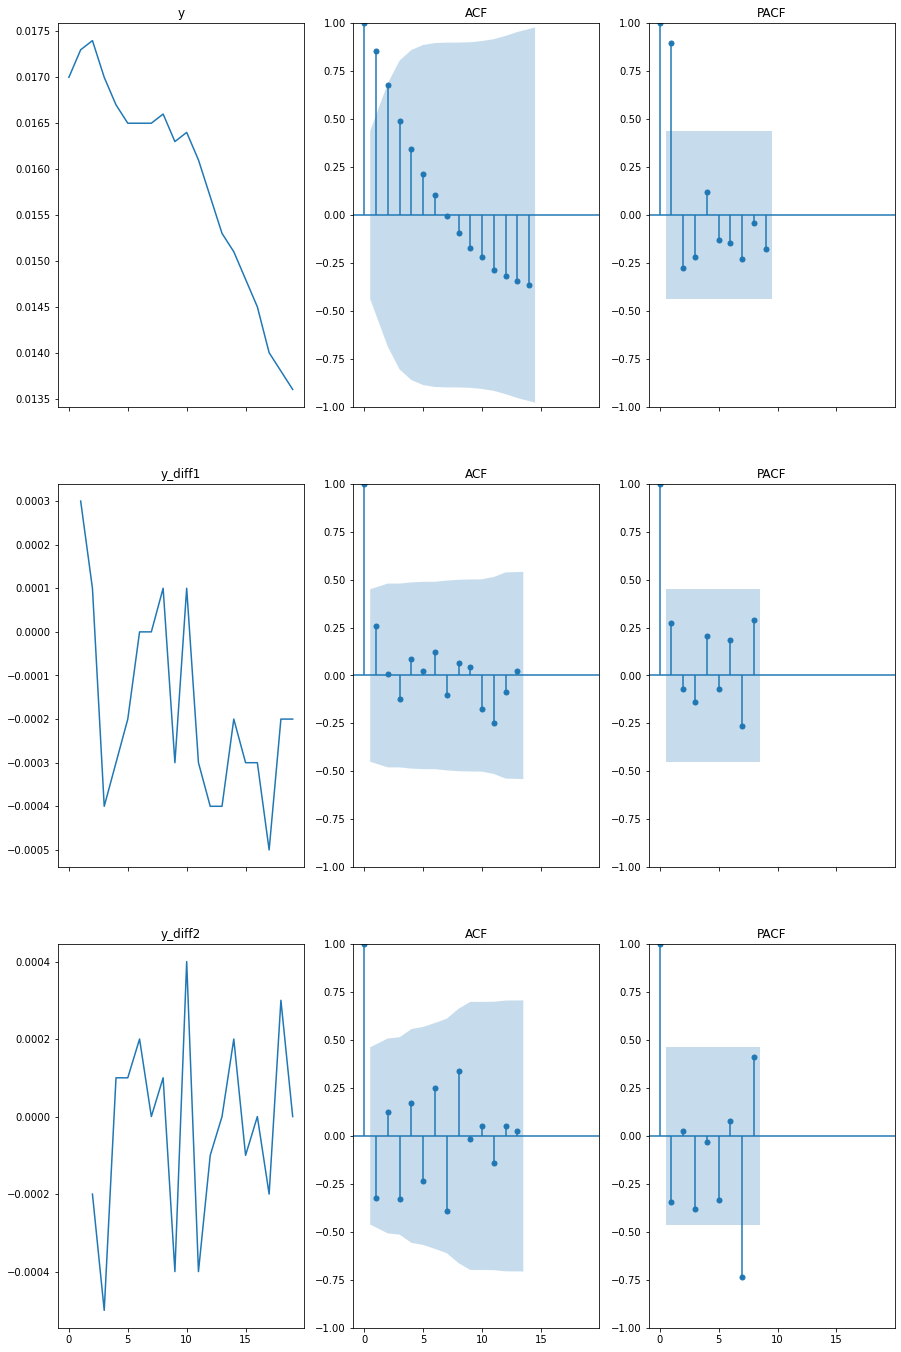

2

In [6]:
acf_pacf(y_train,alpha=0.05)


Test statistic for the series y_diff2: -3.207
P-value for the series y_diff2: 0.01961
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 2.

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=11.415, Time=0.13 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-338.538, Time=0.08 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-336.362, Time=0.08 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=23.338, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-340.538, Time=0.07 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=24.350, Time=0.11 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 2.215 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   20
Model:               SARIMAX(0, 2, 0)   Log Likelihood                 190.269
Date:

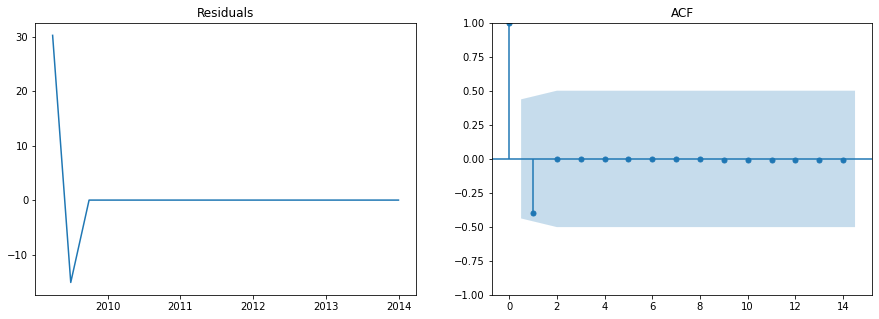


Test statistic for the residuals: -3.592
P-value for the residuals: 0.00592
The residuals are potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 2.



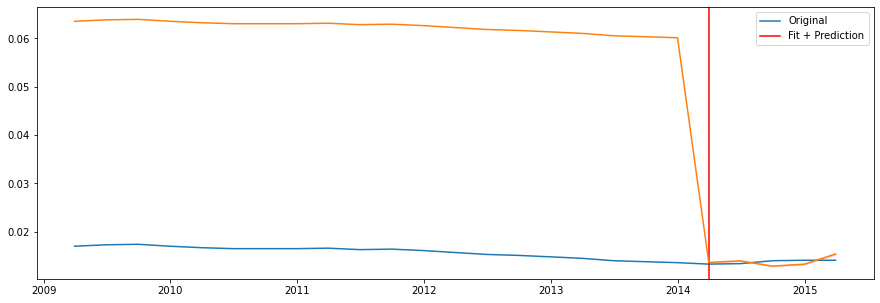

In [7]:
model = find_arimax_params(y_train,exog=X_train)
plot_arimax_fit(model,y_train,y_test=y_test,exog_train=X_train,exog_test=X_test)

The best model is :

$$
ARIMA(0,2,0)
$$

## With col_totale_low_var

For the low variance feature selection we clean the data, build and find the best ARIMA model.

In [8]:
X_train, X_test, y_train, y_test, X_validation = clean_data(data,start,period=period, chronique=chronique,col_used=cl.col_totale_low_var,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y_diff2: -3.207
P-value for the series y_diff2: 0.01961
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 2.

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-302.538, Time=0.16 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-310.538, Time=0.11 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-308.538, Time=0.12 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-308.538, Time=0.12 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-312.538, Time=0.09 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-306.538, Time=0.13 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.731 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   20
Model:               SARIMAX(0, 2, 0)   Log Likelihood                 190.269

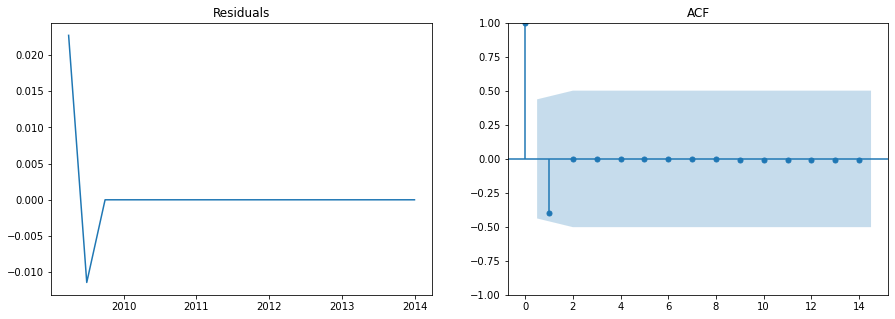


Test statistic for the residuals: -29.831
P-value for the residuals: 0.0
The residuals are potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 2.



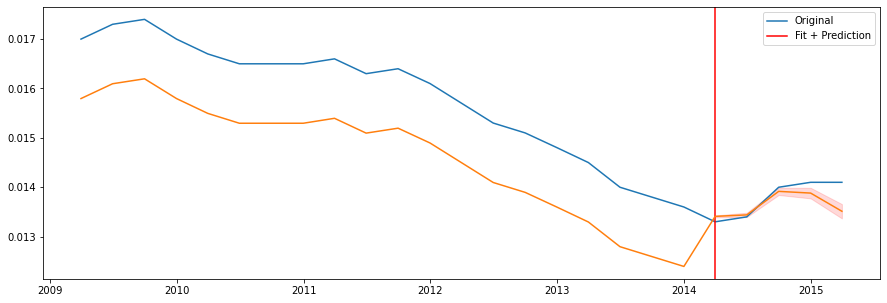

In [9]:
model = find_arimax_params(y_train,X_train)
plot_arimax_fit(model,y_train,y_test,X_train,X_test)

The best model is :

$$
ARIMA(0,2,0)
$$

## With col_totale_kbest

For the kbest feature selection we clean the data, build and find the best ARIMA model.

In [10]:
X_train, X_test, y_train, y_test, X_validation = clean_data(data,start,period=period, chronique=chronique,col_used=cl.col_totale_kbest,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y_diff2: -3.207
P-value for the series y_diff2: 0.01961
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 2.

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=11.788, Time=0.12 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-336.538, Time=0.07 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-16.334, Time=0.09 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-335.155, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-338.538, Time=0.06 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-332.359, Time=0.09 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.503 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   20
Model:               SARIMAX(0, 2, 0)   Log Likelihood                 190.269
Da

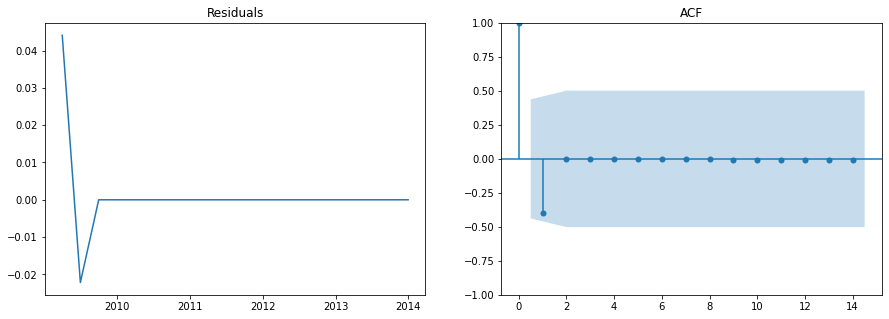


Test statistic for the residuals: -0.831
P-value for the residuals: 0.80992
The residuals are not stationary. We accept the hypothesis of a unit root.



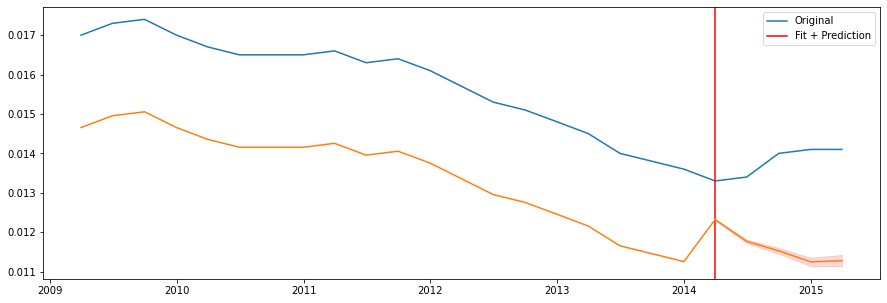

In [11]:
model = find_arimax_params(y_train,X_train)
plot_arimax_fit(model,y_train,y_test,X_train,X_test)

The best model is :

$$
ARIMA(0,2,0)
$$

## With col_totale_recur

For the recursive feature selection we clean the data, build and find the best ARIMA model.

In [12]:
X_train, X_test, y_train, y_test, X_validation = clean_data(data,start, period=period,chronique=chronique,col_used=cl.col_totale_recur,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y_diff2: -3.207
P-value for the series y_diff2: 0.01961
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 2.

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-327.109, Time=0.44 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.448 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   20
Model:               SARIMAX(0, 2, 0)   Log Likelihood                 190.554
Date:                Mon, 12 

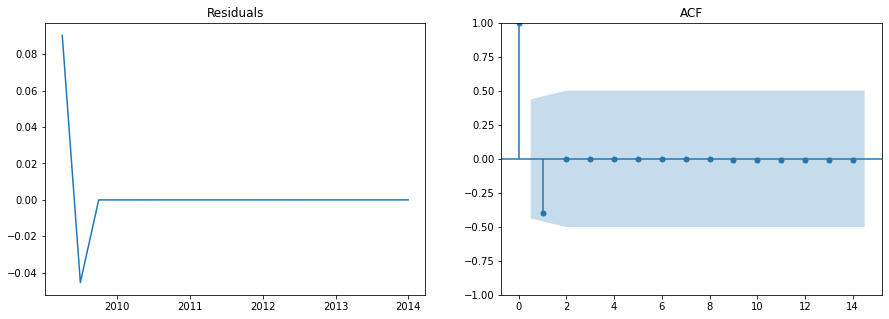


Test statistic for the residuals: -2.174
P-value for the residuals: 0.21589
The residuals are not stationary. We accept the hypothesis of a unit root.



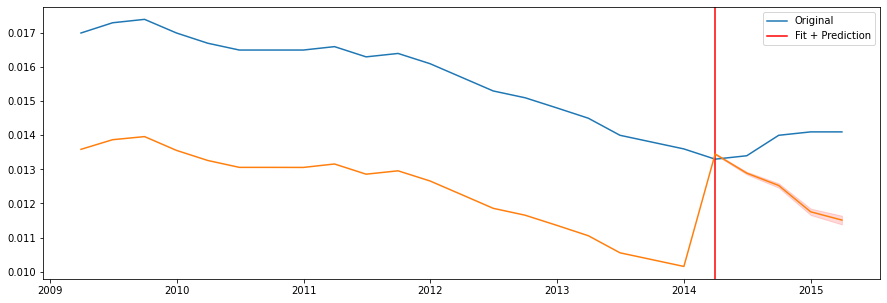

In [13]:
model = find_arimax_params(y_train,X_train)
plot_arimax_fit(model,y_train,y_test,X_train,X_test)

The best model is :

$$
ARIMA(0,2,0)
$$

## With col_totale_sfm

For the select from model feature selection we clean the data, build and find the best ARIMA model.

In [14]:
X_train, X_test, y_train, y_test, X_validation = clean_data(data,start,period=period,chronique=chronique,col_used=cl.col_totale_sfm,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y_diff2: -3.207
P-value for the series y_diff2: 0.01961
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 2.

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-309.135, Time=0.11 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-318.419, Time=0.06 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=26.410, Time=0.08 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-304.949, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-280.506, Time=0.06 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=65.641, Time=0.09 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0] intercept
Total fit time: 0.478 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   20
Model:               SARIMAX(0, 2, 0)   Log Likelihood                 178.209
Dat

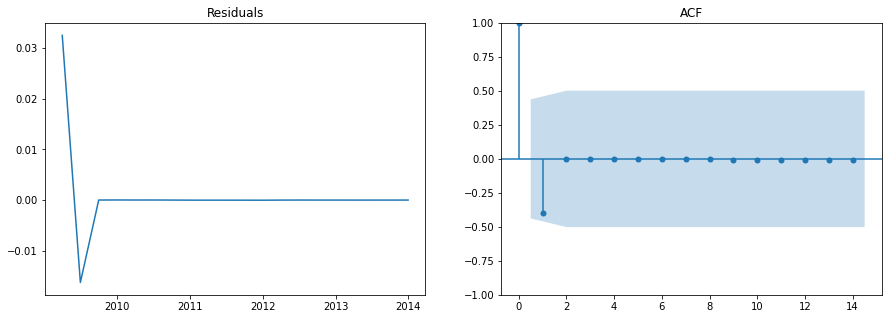


Test statistic for the residuals: -30.102
P-value for the residuals: 0.0
The residuals are potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 2.



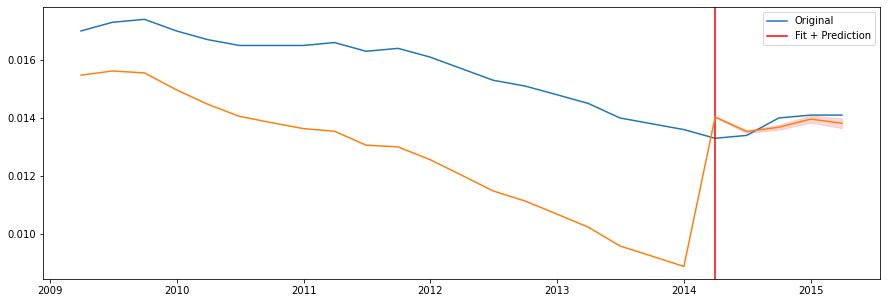

In [15]:
model = find_arimax_params(y_train,X_train)
plot_arimax_fit(model,y_train,y_test,X_train,X_test)

The best model is :

$$
ARIMA(0,2,0)
$$

## With col_totale_tree

For the tree-based feature selection we clean the data, build and find the best ARIMA model.

In [16]:
X_train, X_test, y_train, y_test, X_validation = clean_data(data,start,period=period,chronique=chronique,col_used=cl.col_totale_tree,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y_diff2: -3.207
P-value for the series y_diff2: 0.01961
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 2.

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-320.914, Time=0.12 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-328.538, Time=0.08 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-326.901, Time=0.09 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-327.000, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-330.538, Time=0.07 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-324.815, Time=0.10 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.557 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   20
Model:               SARIMAX(0, 2, 0)   Log Likelihood                 190.269

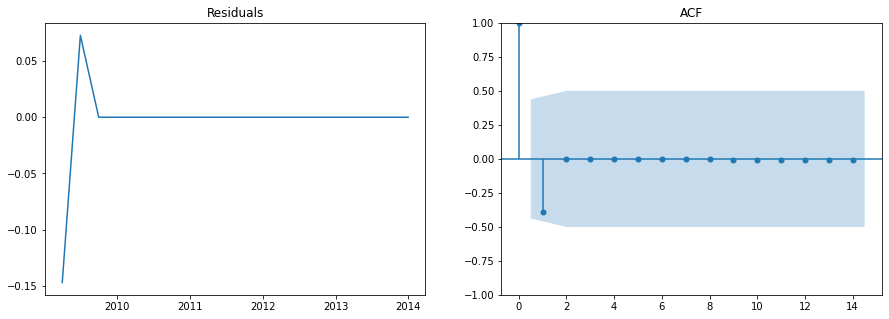


Test statistic for the residuals: -30.422
P-value for the residuals: 0.0
The residuals are potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 2.



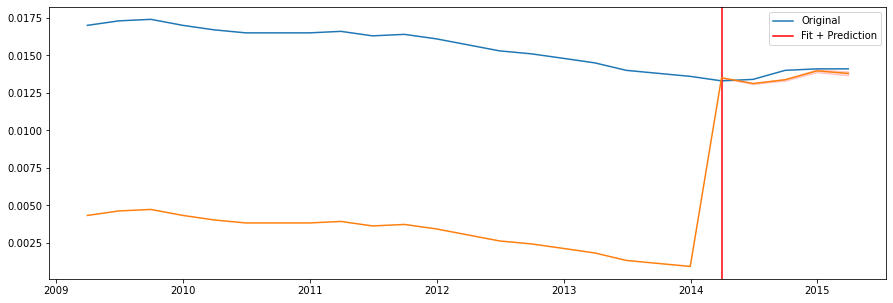

In [17]:
model = find_arimax_params(y_train,X_train)
plot_arimax_fit(model,y_train,y_test,X_train,X_test)

The best model is :

$$
ARIMA(0,2,0)
$$

## With col_totale_seq_for

For the sequential feature selection we clean the data, build and find the best ARIMA model.

In [18]:
X_train, X_test, y_train, y_test, X_validation = clean_data(data,start,period=period,chronique=chronique,col_used=cl.col_totale_seq_for,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y_diff2: -3.207
P-value for the series y_diff2: 0.01961
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 2.

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-205.753, Time=0.11 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-285.119, Time=0.07 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-292.550, Time=0.08 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-289.348, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-250.606, Time=0.06 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=-290.336, Time=0.08 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-289.882, Time=0.09 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-273.343, Time=0.22 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-294.479, Time=0.07 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=-292.451, Time=0.07 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-292.68

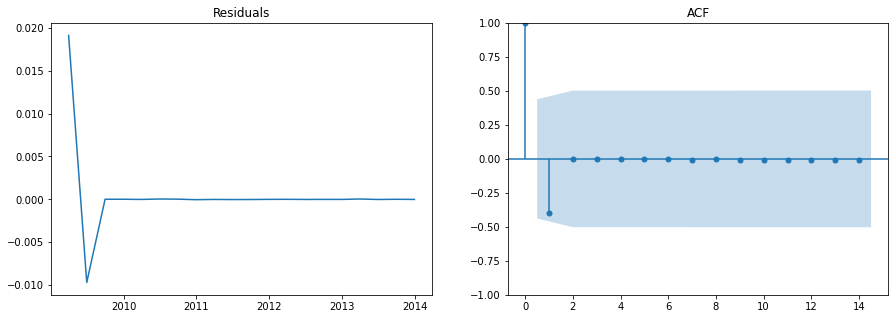


Test statistic for the residuals: -0.202
P-value for the residuals: 0.93826
The residuals are not stationary. We accept the hypothesis of a unit root.



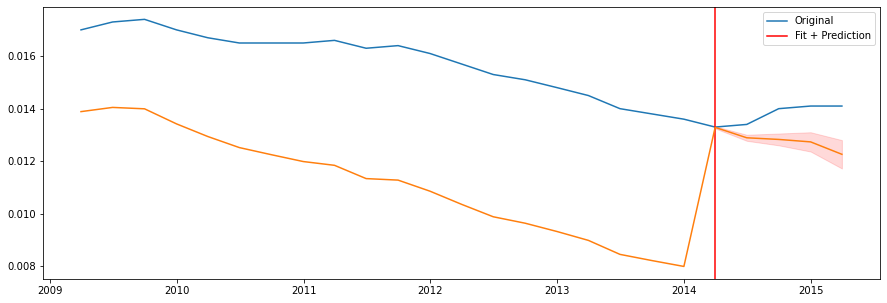

In [19]:
model = find_arimax_params(y_train,X_train)
plot_arimax_fit(model,y_train,y_test,X_train,X_test)

The best model is :

$$
ARIMA(0,2,0)
$$

## With col_totale_seq_bac

For the backward feature selection we clean the data, build and find the best ARIMA model.

In [20]:
X_train, X_test, y_train, y_test, X_validation = clean_data(data,start,period=period,chronique=chronique,col_used=cl.col_totale_seq_bac,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y_diff2: -3.207
P-value for the series y_diff2: 0.01961
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 2.

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-328.538, Time=0.11 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-336.538, Time=0.07 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-334.538, Time=0.08 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-334.538, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-338.538, Time=0.06 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-332.538, Time=0.09 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.486 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   20
Model:               SARIMAX(0, 2, 0)   Log Likelihood                 190.269

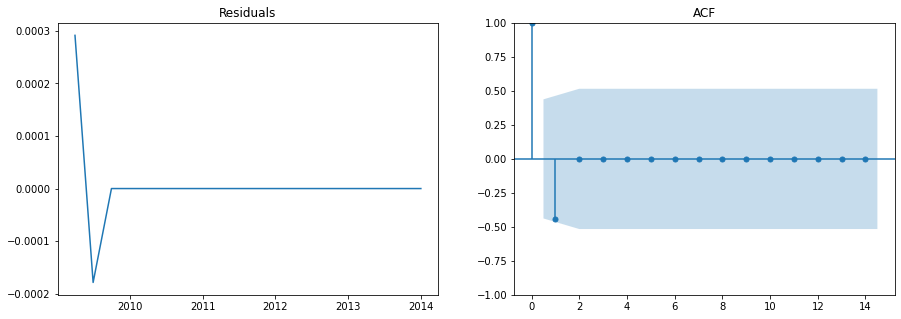


Test statistic for the residuals: -22.839
P-value for the residuals: 0.0
The residuals are potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 2.



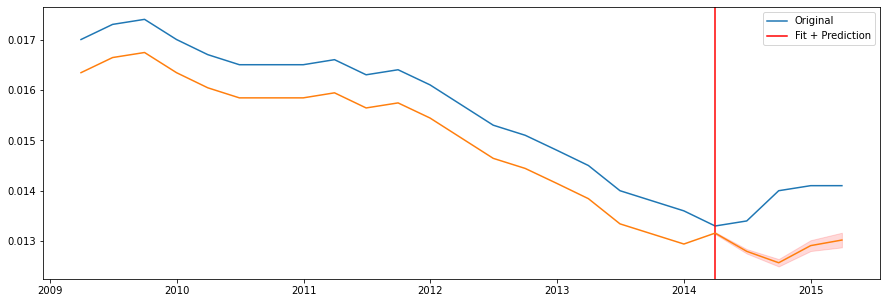

In [21]:
model = find_arimax_params(y_train,X_train)
plot_arimax_fit(model,y_train,y_test,X_train,X_test)

The best model is :

$$
ARIMA(0,2,0)
$$

# Focus on chronique CHR2

Then for chronique CHR2 we will build and plot all models for each type of features selection.

In [22]:
start = 1
period = 24
chronique = b"CHR2"

## With col_totale_corr

In [23]:
X_train, X_test, y_train, y_test, X_validation = clean_data(data,start,period=period,chronique=chronique,col_used=cl.col_2_corr,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y: -3.193
P-value for the series y: 0.02038
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 0.



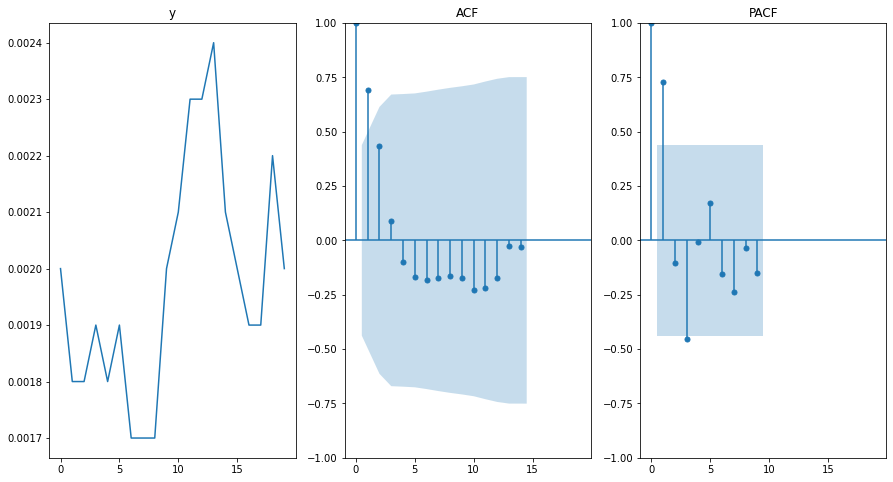

0

In [24]:
acf_pacf(y_train,alpha=0.05)


Test statistic for the series y: -3.193
P-value for the series y: 0.02038
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 0.

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-284.708, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-249.489, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-288.361, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-288.316, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-286.487, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-284.709, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-280.825, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-286.207, Time=0.03 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.249 seconds
                               SARIMAX Results                                
Dep. Variable:                      y

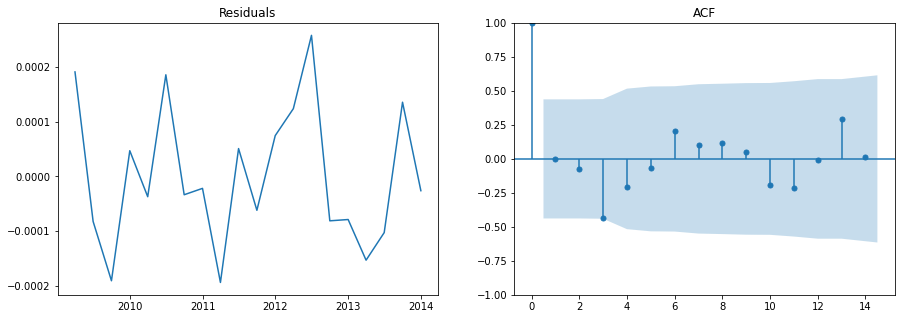


Test statistic for the residuals: -1.437
P-value for the residuals: 0.56424
The residuals are not stationary. We accept the hypothesis of a unit root.



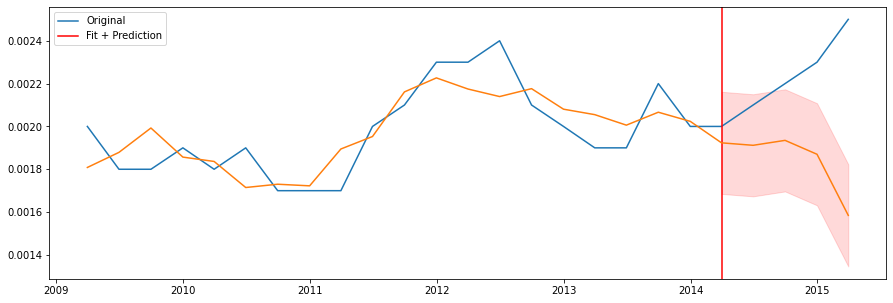

In [25]:
model = find_arimax_params(y_train,exog=X_train)
plot_arimax_fit(model,y_train,y_test=y_test,exog_train=X_train,exog_test=X_test)

The best model is :

$$
ARIMA(0,1,0)
$$

## With col_totale_low_var

In [26]:
X_train, X_test, y_train, y_test, X_validation = clean_data(data,start,period=period,chronique=chronique,col_used=cl.col_2_low_var,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y: -3.193
P-value for the series y: 0.02038
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 0.

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-343.176, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-351.759, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-349.368, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-349.453, Time=0.10 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-347.460, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-349.759, Time=0.09 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.621 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   20
Model:                        SARIMAX   Log Likelihood                 211.880
Date:      

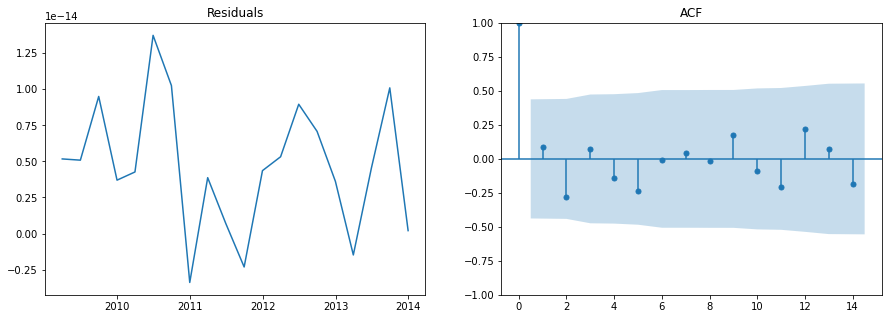


Test statistic for the residuals: -3.664
P-value for the residuals: 0.00464
The residuals are potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 0.



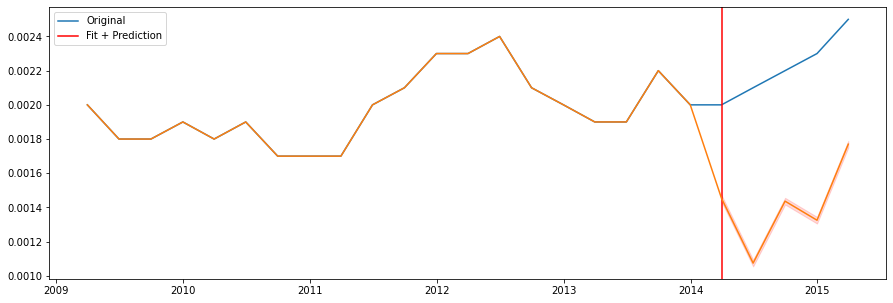

In [27]:
model = find_arimax_params(y_train,X_train)
plot_arimax_fit(model,y_train,y_test,X_train,X_test)

The best model is :

$$
ARIMA(0,1,0)
$$

## With col_totale_kbest

In [28]:
X_train, X_test, y_train, y_test, X_validation = clean_data(data,start,period=period,chronique=chronique,col_used=cl.col_2_kbest,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y: -3.193
P-value for the series y: 0.02038
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 0.

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-367.587, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-381.759, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-379.759, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-371.946, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-379.759, Time=0.06 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.445 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   20
Model:                        SARIMAX   Log Likelihood                 211.880
Date:           

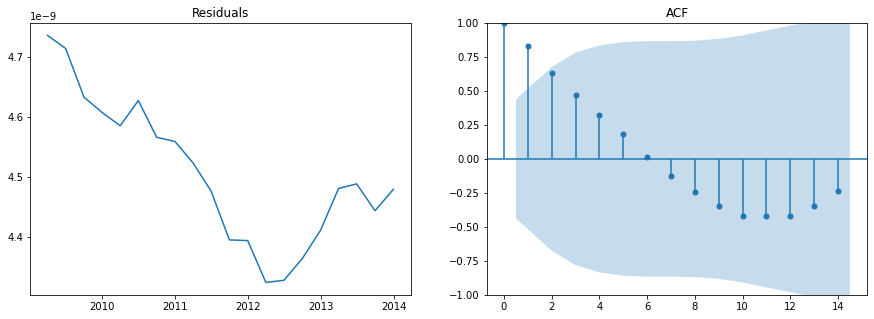


Test statistic for the residuals: -2.783
P-value for the residuals: 0.06077
The residuals are not stationary. We accept the hypothesis of a unit root.



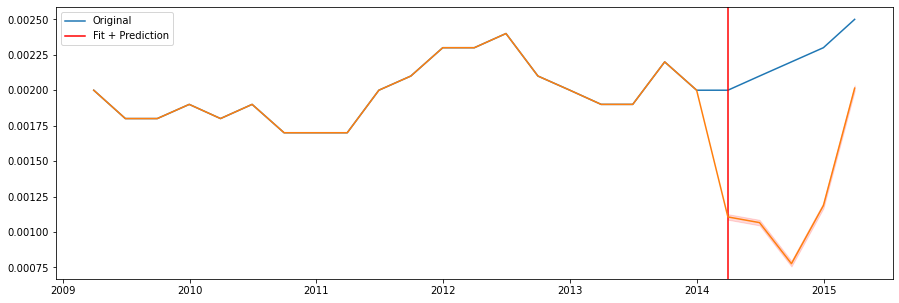

In [29]:
model = find_arimax_params(y_train,X_train)
plot_arimax_fit(model,y_train,y_test,X_train,X_test)

The best model is :

$$
ARIMA(0,1,0)
$$

## With col_totale_recur

In [30]:
X_train, X_test, y_train, y_test, X_validation = clean_data(data,start,period=period,chronique=chronique,col_used=cl.col_2_recur,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y: -3.193
P-value for the series y: 0.02038
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 0.

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-331.559, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-318.897, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-322.043, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-317.163, Time=0.09 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-318.035, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-334.705, Time=0.13 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-314.787, Time=0.10 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-334.287, Time=0.08 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-332.953, Time=0.14 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-334.405, Time=0.12 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-327.949, Time=0.08

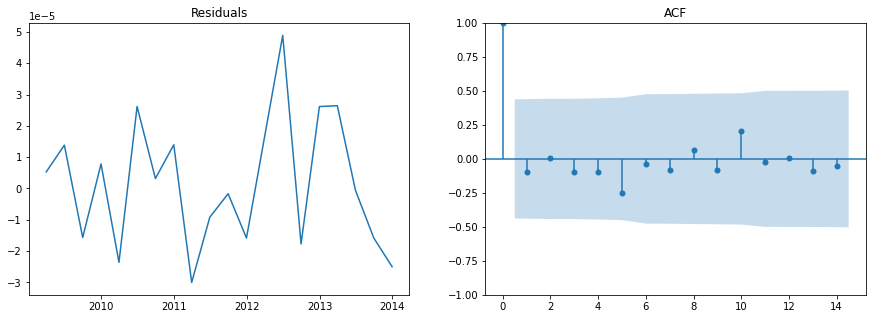


Test statistic for the residuals: -33.493
P-value for the residuals: 0.0
The residuals are potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 0.



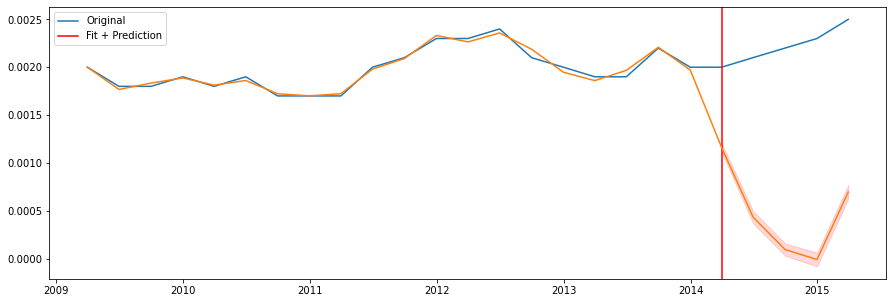

In [31]:
model = find_arimax_params(y_train,X_train)
plot_arimax_fit(model,y_train,y_test,X_train,X_test)

The best model is :

$$
ARIMA(0,1,0)
$$

## With col_totale_sfm

In [32]:
X_train, X_test, y_train, y_test, X_validation = clean_data(data,start,period=period,chronique=chronique,col_used=cl.col_2_sfm,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y: -3.193
P-value for the series y: 0.02038
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 0.

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-291.116, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-260.090, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-303.872, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-303.293, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-302.011, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-301.838, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-299.833, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-301.890, Time=0.06 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.469 seconds
                               SARIMAX Results                                
Dep. Variable:                      y

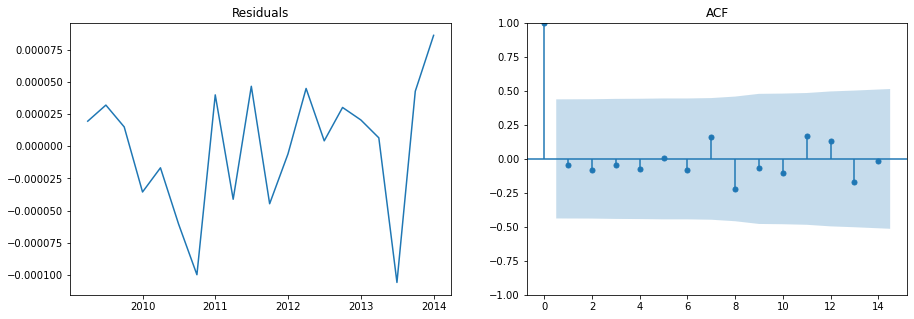


Test statistic for the residuals: -2.344
P-value for the residuals: 0.15828
The residuals are not stationary. We accept the hypothesis of a unit root.



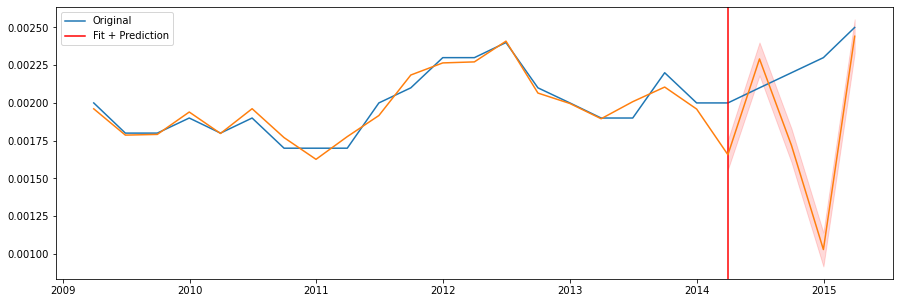

In [33]:
model = find_arimax_params(y_train,X_train)
plot_arimax_fit(model,y_train,y_test,X_train,X_test)

The best model is :

$$
ARIMA(0,1,0)
$$

## With col_totale_tree

In [34]:
X_train, X_test, y_train, y_test, X_validation = clean_data(data,start,period=period,chronique=chronique,col_used=cl.col_2_tree,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y: -3.193
P-value for the series y: 0.02038
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 0.

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-293.135, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-263.820, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-307.746, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-310.753, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-308.773, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-299.834, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-303.677, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-308.350, Time=0.06 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 0.461 seconds
                               SARIMAX Results                                
Dep. Variable:                      y

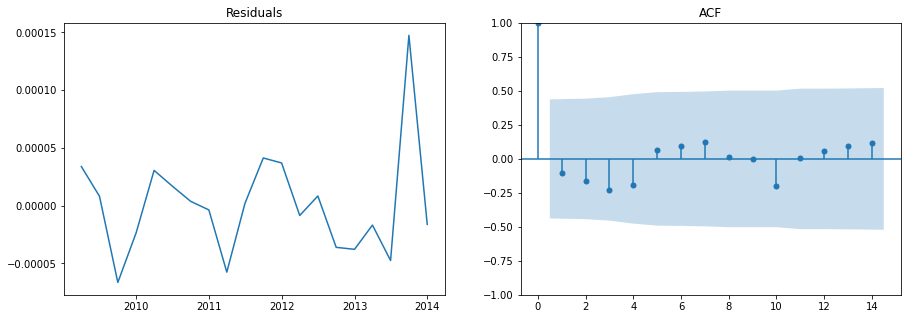


Test statistic for the residuals: -1.025
P-value for the residuals: 0.74391
The residuals are not stationary. We accept the hypothesis of a unit root.



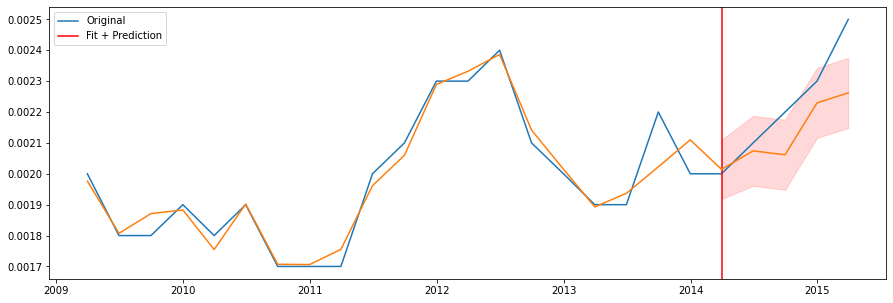

In [35]:
model = find_arimax_params(y_train,X_train)
plot_arimax_fit(model,y_train,y_test,X_train,X_test)

The best model is :

$$
ARIMA(0,1,0)
$$

## With col_totale_seq_for

In [36]:
X_train, X_test, y_train, y_test,X_validation = clean_data(data,start,period=period,chronique=chronique,col_used=cl.col_2_seq_for,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y: -3.193
P-value for the series y: 0.02038
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 0.

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-259.055, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-225.007, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-264.077, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-263.275, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-264.046, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-258.969, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-259.656, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-262.060, Time=0.08 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.595 seconds
                               SARIMAX Results                                
Dep. Variable:                      y

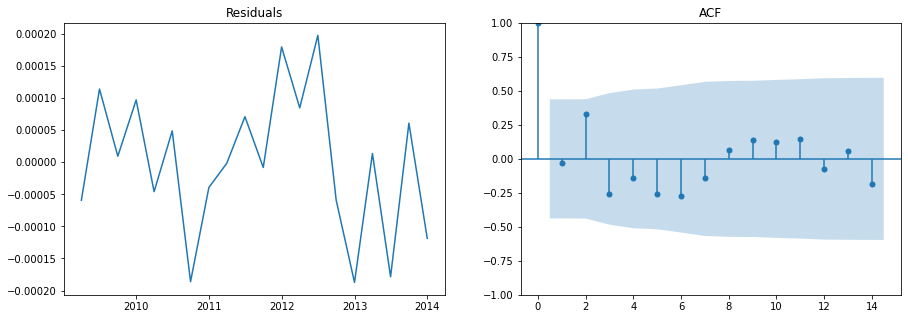


Test statistic for the residuals: -3.216
P-value for the residuals: 0.01907
The residuals are potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 0.



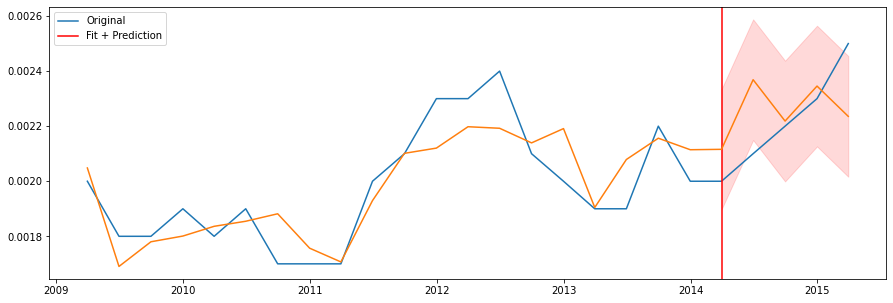

In [37]:
model = find_arimax_params(y_train,X_train)
plot_arimax_fit(model,y_train,y_test,X_train,X_test)

The best model is :

$$
ARIMA(0,1,0)
$$

## With col_totale_seq_bac

In [38]:
X_train, X_test, y_train, y_test, X_validation = clean_data(data,start,period=period,chronique=chronique,col_used=cl.col_2_seq_bac,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y: -3.193
P-value for the series y: 0.02038
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 0.

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-372.411, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-381.759, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-379.759, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-379.759, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-377.498, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-379.759, Time=0.06 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.399 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   20
Model:                        SARIMAX   Log Likelihood                 211.880
Date:      

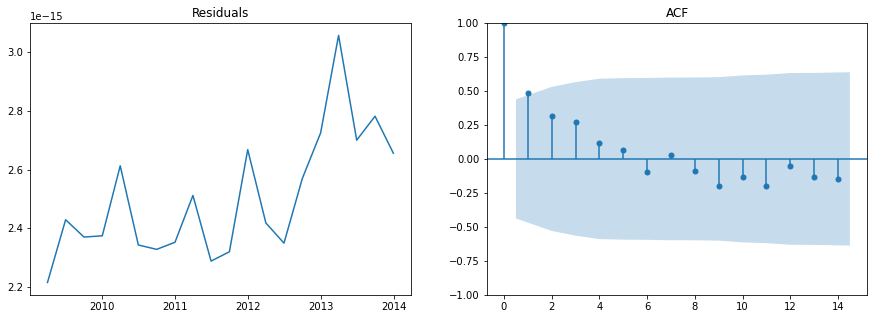


Test statistic for the residuals: 0.489
P-value for the residuals: 0.98454
The residuals are not stationary. We accept the hypothesis of a unit root.



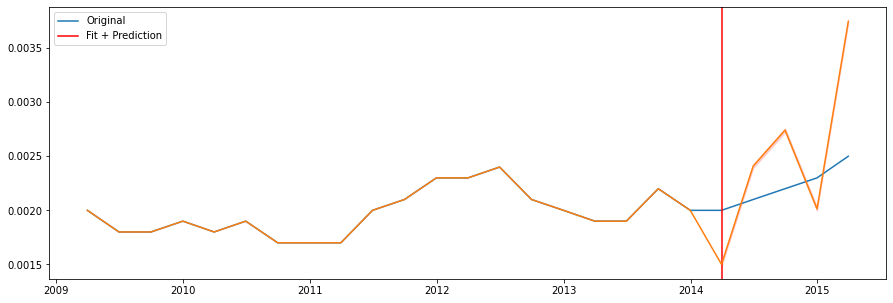

In [39]:
model = find_arimax_params(y_train,X_train)
plot_arimax_fit(model,y_train,y_test,X_train,X_test)

The best model is :

$$
ARIMA(0,1,0)
$$

# Focus on chronique CHR8

In [40]:
start = 2
chronique =b"CHR8"
period = 24

## With col_totale_corr

In [41]:
X_train, X_test, y_train, y_test, X_validation = clean_data(data,start,period=period,chronique=chronique,col_used=cl.col_8_corr,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y_diff3: -10.561
P-value for the series y_diff3: 0.0
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 3.



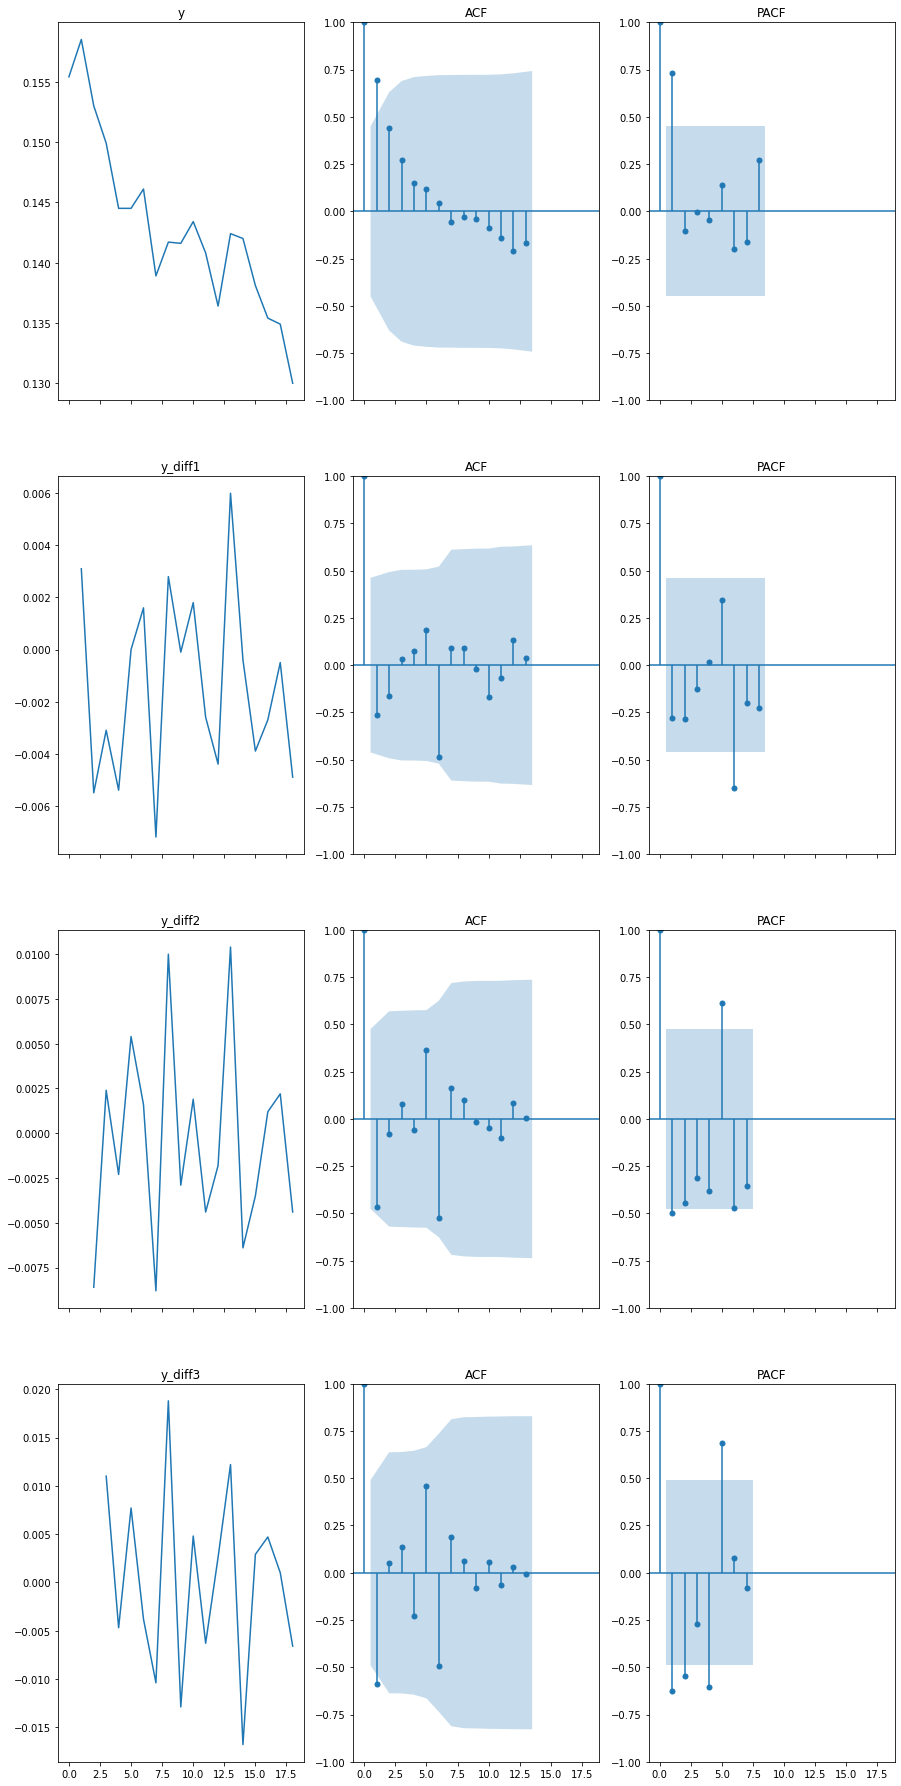

3

In [42]:
acf_pacf(y_train,alpha=0.05)


Test statistic for the series y_diff3: -10.561
P-value for the series y_diff3: 0.0
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 3.

Performing stepwise search to minimize aic
 ARIMA(2,3,2)(0,0,0)[0]             : AIC=-113.040, Time=0.10 sec
 ARIMA(0,3,0)(0,0,0)[0]             : AIC=-94.461, Time=0.03 sec
 ARIMA(1,3,0)(0,0,0)[0]             : AIC=-121.696, Time=0.03 sec
 ARIMA(0,3,1)(0,0,0)[0]             : AIC=-122.005, Time=0.03 sec
 ARIMA(1,3,1)(0,0,0)[0]             : AIC=-118.233, Time=0.04 sec
 ARIMA(0,3,2)(0,0,0)[0]             : AIC=-107.869, Time=0.07 sec
 ARIMA(1,3,2)(0,0,0)[0]             : AIC=-113.641, Time=0.09 sec
 ARIMA(0,3,1)(0,0,0)[0] intercept   : AIC=-119.886, Time=0.04 sec

Best model:  ARIMA(0,3,1)(0,0,0)[0]          
Total fit time: 0.429 seconds
                               SARIMAX Results                                
Dep. Variable:               

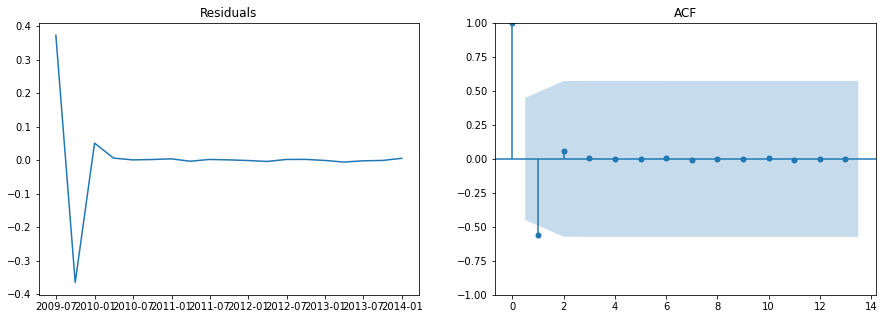


Test statistic for the residuals: -2.465
P-value for the residuals: 0.12422
The residuals are not stationary. We accept the hypothesis of a unit root.



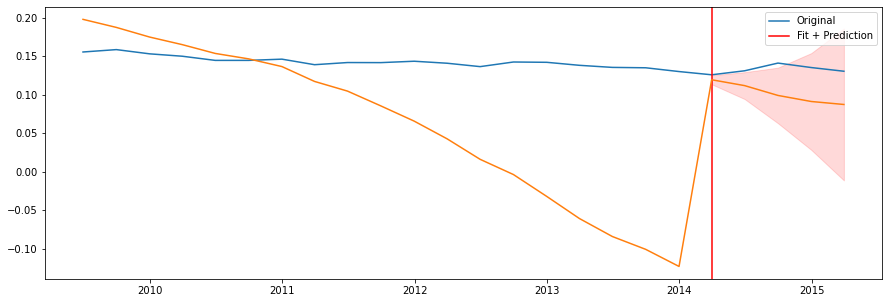

In [43]:
model = find_arimax_params(y_train,exog=X_train)
plot_arimax_fit(model,y_train,y_test=y_test,exog_train=X_train,exog_test=X_test)

The best model is :

$$
ARIMA(1,5,0)
$$

## With col_totale_low_var

In [44]:
X_train, X_test, y_train, y_test, X_validation = clean_data(data,start,period=period,chronique=chronique,col_used=cl.col_8_low_var,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y_diff3: -10.561
P-value for the series y_diff3: 0.0
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 3.

Performing stepwise search to minimize aic
 ARIMA(2,3,2)(0,0,0)[0]             : AIC=-70.461, Time=0.29 sec
 ARIMA(0,3,0)(0,0,0)[0]             : AIC=-78.461, Time=0.19 sec
 ARIMA(1,3,0)(0,0,0)[0]             : AIC=-76.348, Time=0.22 sec
 ARIMA(0,3,1)(0,0,0)[0]             : AIC=70.000, Time=0.02 sec
 ARIMA(1,3,1)(0,0,0)[0]             : AIC=-3.929, Time=0.24 sec
 ARIMA(0,3,0)(0,0,0)[0] intercept   : AIC=-76.461, Time=0.21 sec

Best model:  ARIMA(0,3,0)(0,0,0)[0]          
Total fit time: 1.171 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   19
Model:               SARIMAX(0, 3, 0)   Log Likelihood                  73.230
Date:     

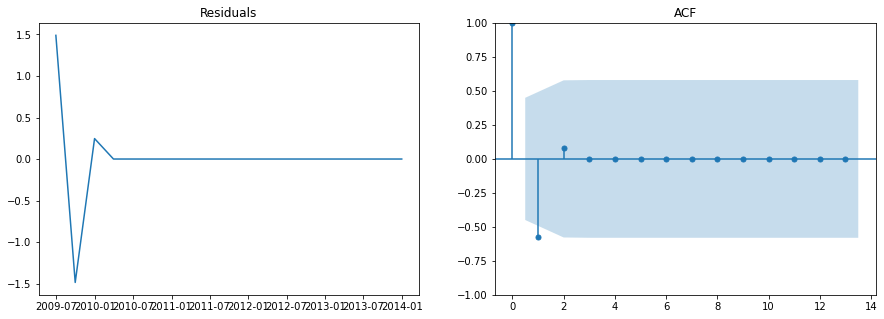


Test statistic for the residuals: -15.685
P-value for the residuals: 0.0
The residuals are potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 3.



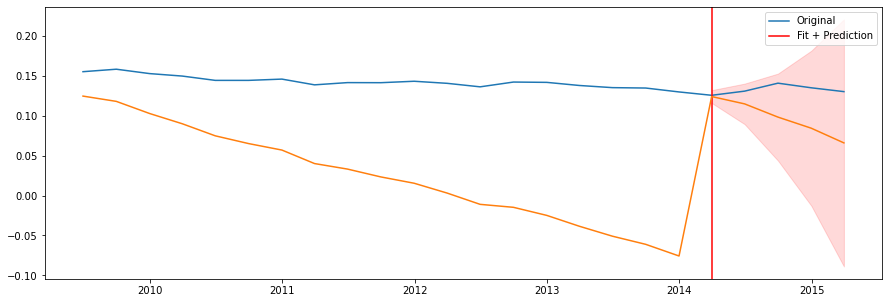

In [45]:
model = find_arimax_params(y_train,X_train)
plot_arimax_fit(model,y_train,y_test,X_train,X_test)

The best model is :

$$
ARIMA(0,1,0)
$$

## With col_totale_kbest

In [46]:
X_train, X_test, y_train, y_test, X_validation = clean_data(data,start,period=period,chronique=chronique,col_used=cl.col_8_kbest,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y_diff3: -10.561
P-value for the series y_diff3: 0.0
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 3.

Performing stepwise search to minimize aic
 ARIMA(2,3,2)(0,0,0)[0]             : AIC=-95.635, Time=0.25 sec
 ARIMA(0,3,0)(0,0,0)[0]             : AIC=-104.461, Time=0.12 sec
 ARIMA(1,3,0)(0,0,0)[0]             : AIC=44.000, Time=0.01 sec
 ARIMA(0,3,1)(0,0,0)[0]             : AIC=-102.217, Time=0.19 sec
 ARIMA(1,3,1)(0,0,0)[0]             : AIC=46.000, Time=0.01 sec
 ARIMA(0,3,0)(0,0,0)[0] intercept   : AIC=-102.461, Time=0.14 sec

Best model:  ARIMA(0,3,0)(0,0,0)[0]          
Total fit time: 0.729 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   19
Model:               SARIMAX(0, 3, 0)   Log Likelihood                  73.230
Date:  

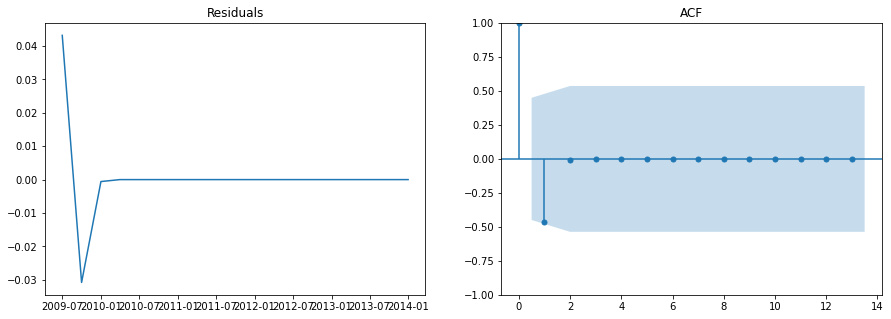


Test statistic for the residuals: -1.537
P-value for the residuals: 0.51518
The residuals are not stationary. We accept the hypothesis of a unit root.



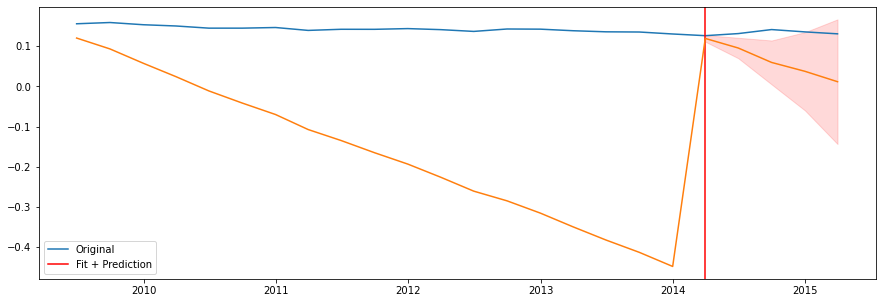

In [47]:
model = find_arimax_params(y_train,X_train)
plot_arimax_fit(model,y_train,y_test,X_train,X_test)

The best model is :

$$
ARIMA(0,1,0)
$$

## With col_totale_recur

In [48]:
X_train, X_test, y_train, y_test,X_validation = clean_data(data,start,period=period,chronique=chronique,col_used=cl.col_8_recur,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y_diff3: -10.561
P-value for the series y_diff3: 0.0
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 3.

Performing stepwise search to minimize aic
 ARIMA(2,3,2)(0,0,0)[0]             : AIC=-244.571, Time=0.21 sec
 ARIMA(0,3,0)(0,0,0)[0]             : AIC=-235.977, Time=0.22 sec
 ARIMA(1,3,0)(0,0,0)[0]             : AIC=-264.845, Time=0.06 sec
 ARIMA(0,3,1)(0,0,0)[0]             : AIC=-229.605, Time=0.13 sec
 ARIMA(2,3,0)(0,0,0)[0]             : AIC=-263.211, Time=0.06 sec
 ARIMA(1,3,1)(0,0,0)[0]             : AIC=-267.070, Time=0.06 sec
 ARIMA(2,3,1)(0,0,0)[0]             : AIC=-251.092, Time=0.06 sec
 ARIMA(1,3,2)(0,0,0)[0]             : AIC=-249.005, Time=0.27 sec
 ARIMA(0,3,2)(0,0,0)[0]             : AIC=-229.089, Time=0.06 sec
 ARIMA(1,3,1)(0,0,0)[0] intercept   : AIC=-245.703, Time=0.33 sec

Best model:  ARIMA(1,3,1)(0,0,0)[0]          
Total

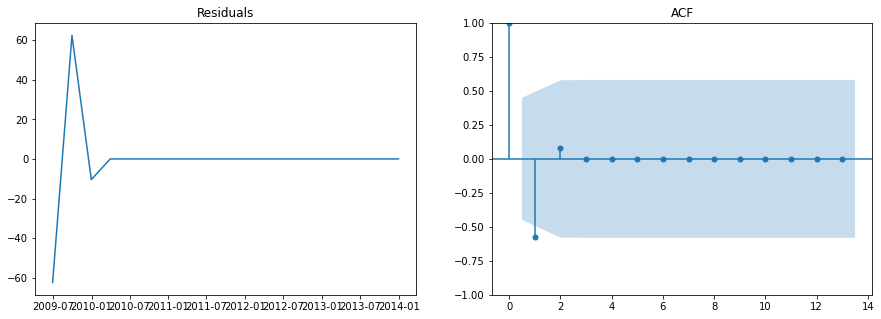


Test statistic for the residuals: -2.791
P-value for the residuals: 0.05951
The residuals are not stationary. We accept the hypothesis of a unit root.



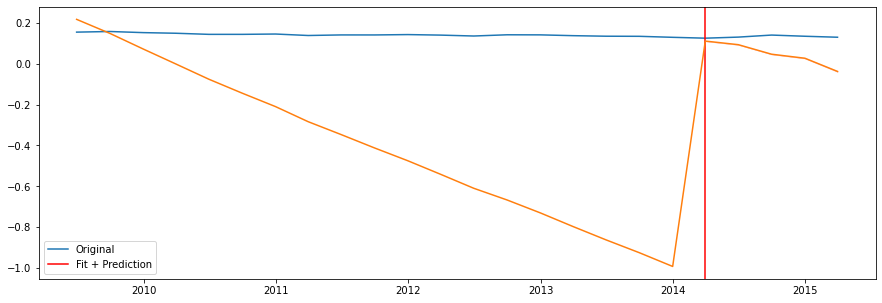

In [49]:
model = find_arimax_params(y_train,X_train)
plot_arimax_fit(model,y_train,y_test,X_train,X_test)

The best model is :

$$
ARIMA(0,1,0)
$$

## With col_totale_sfm

In [50]:
X_train, X_test, y_train, y_test, X_validation = clean_data(data,start,period=period,chronique=chronique,col_used=cl.col_8_sfm,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y_diff3: -10.561
P-value for the series y_diff3: 0.0
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 3.

Performing stepwise search to minimize aic
 ARIMA(2,3,2)(0,0,0)[0]             : AIC=-274.270, Time=0.11 sec
 ARIMA(0,3,0)(0,0,0)[0]             : AIC=-162.630, Time=0.63 sec
 ARIMA(1,3,0)(0,0,0)[0]             : AIC=-169.405, Time=0.54 sec
 ARIMA(0,3,1)(0,0,0)[0]             : AIC=-152.007, Time=0.34 sec
 ARIMA(1,3,2)(0,0,0)[0]             : AIC=-173.661, Time=0.81 sec
 ARIMA(2,3,1)(0,0,0)[0]             : AIC=-143.856, Time=0.92 sec
 ARIMA(3,3,2)(0,0,0)[0]             : AIC=-254.393, Time=0.19 sec
 ARIMA(2,3,3)(0,0,0)[0]             : AIC=-150.591, Time=0.81 sec
 ARIMA(1,3,1)(0,0,0)[0]             : AIC=-172.740, Time=0.79 sec
 ARIMA(1,3,3)(0,0,0)[0]             : AIC=-151.552, Time=0.49 sec
 ARIMA(3,3,1)(0,0,0)[0]             : AIC=54.000, Ti

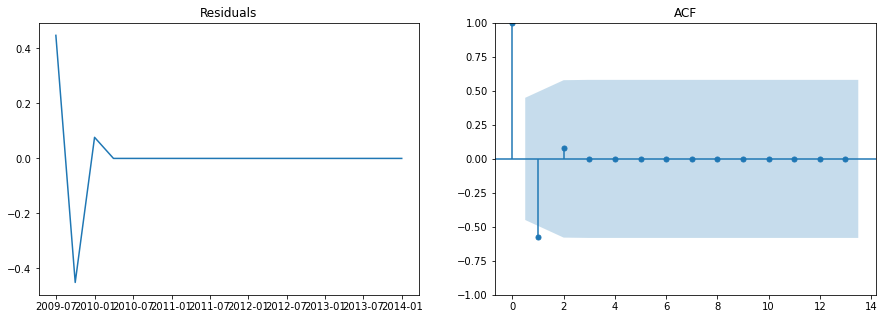


Test statistic for the residuals: -4319142812281.915
P-value for the residuals: 0.0
The residuals are potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 3.



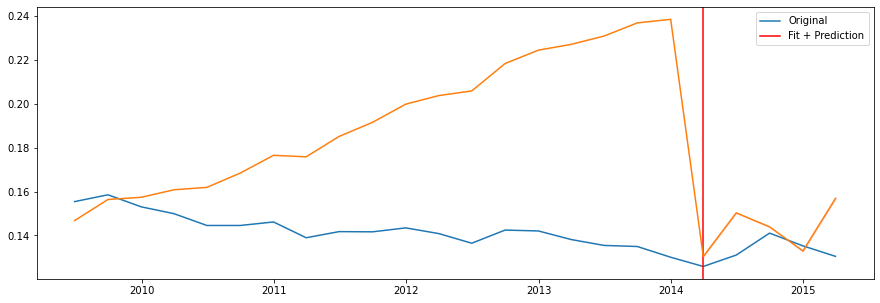

In [51]:
model = find_arimax_params(y_train,X_train)
plot_arimax_fit(model,y_train,y_test,X_train,X_test)

The best model is :

$$
ARIMA(0,1,0)
$$

## With col_totale_tree

In [52]:
X_train, X_test, y_train, y_test, X_validation = clean_data(data,start,period=period,chronique=chronique,col_used=cl.col_8_tree,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y_diff3: -10.561
P-value for the series y_diff3: 0.0
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 3.

Performing stepwise search to minimize aic
 ARIMA(2,3,2)(0,0,0)[0]             : AIC=-92.461, Time=0.22 sec
 ARIMA(0,3,0)(0,0,0)[0]             : AIC=-100.461, Time=0.14 sec
 ARIMA(1,3,0)(0,0,0)[0]             : AIC=48.000, Time=0.01 sec
 ARIMA(0,3,1)(0,0,0)[0]             : AIC=-98.461, Time=0.17 sec
 ARIMA(1,3,1)(0,0,0)[0]             : AIC=-95.283, Time=0.18 sec
 ARIMA(0,3,0)(0,0,0)[0] intercept   : AIC=-98.461, Time=0.15 sec

Best model:  ARIMA(0,3,0)(0,0,0)[0]          
Total fit time: 0.888 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   19
Model:               SARIMAX(0, 3, 0)   Log Likelihood                  73.230
Date:   

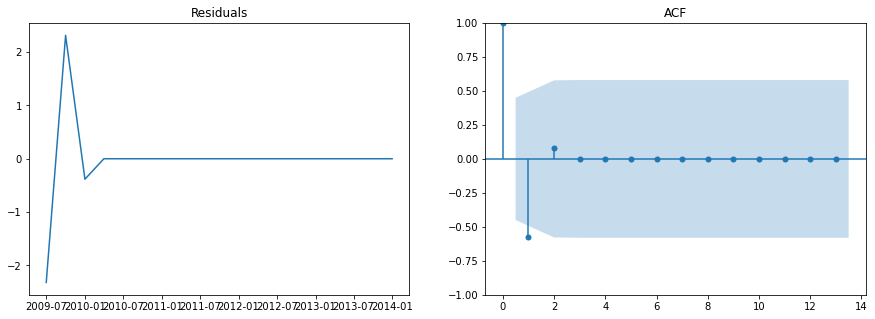


Test statistic for the residuals: -77.965
P-value for the residuals: 0.0
The residuals are potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 3.



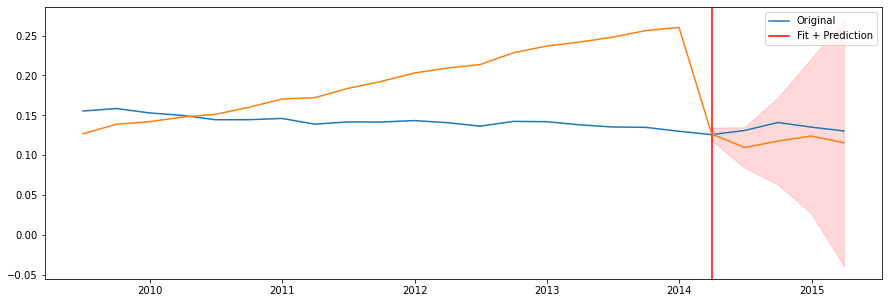

In [53]:
model = find_arimax_params(y_train,X_train)
plot_arimax_fit(model,y_train,y_test,X_train,X_test)

The best model is :

$$
ARIMA(0,1,0)
$$

## With col_totale_seq_for

In [54]:
X_train, X_test, y_train, y_test, X_validation = clean_data(data,start,period=period,chronique=chronique,col_used=cl.col_8_seq_for,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y_diff3: -10.561
P-value for the series y_diff3: 0.0
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 3.

Performing stepwise search to minimize aic
 ARIMA(2,3,2)(0,0,0)[0]             : AIC=50.000, Time=0.03 sec
 ARIMA(0,3,0)(0,0,0)[0]             : AIC=-104.461, Time=0.14 sec
 ARIMA(1,3,0)(0,0,0)[0]             : AIC=-31.871, Time=0.15 sec
 ARIMA(0,3,1)(0,0,0)[0]             : AIC=-102.461, Time=0.17 sec
 ARIMA(1,3,1)(0,0,0)[0]             : AIC=46.000, Time=0.02 sec
 ARIMA(0,3,0)(0,0,0)[0] intercept   : AIC=-102.461, Time=0.15 sec

Best model:  ARIMA(0,3,0)(0,0,0)[0]          
Total fit time: 0.659 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   19
Model:               SARIMAX(0, 3, 0)   Log Likelihood                  73.230
Date:  

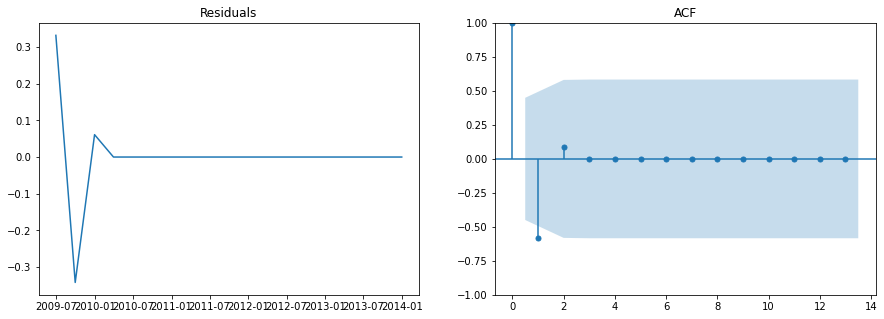


Test statistic for the residuals: -5.465
P-value for the residuals: 0.0
The residuals are potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 3.



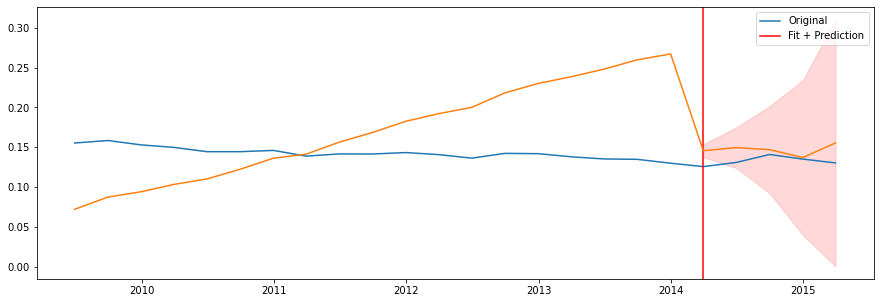

In [55]:
model = find_arimax_params(y_train,X_train)
plot_arimax_fit(model,y_train,y_test,X_train,X_test)

The best model is :

$$
ARIMA(0,1,0)
$$

## With col_totale_seq_bac

In [56]:
X_train, X_test, y_train, y_test, X_validation = clean_data(data,start,period=period,chronique=chronique,col_used=cl.col_8_seq_bac,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y_diff3: -10.561
P-value for the series y_diff3: 0.0
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 3.

Performing stepwise search to minimize aic
 ARIMA(2,3,2)(0,0,0)[0]             : AIC=50.000, Time=0.02 sec
 ARIMA(0,3,0)(0,0,0)[0]             : AIC=-104.461, Time=0.14 sec
 ARIMA(1,3,0)(0,0,0)[0]             : AIC=-102.312, Time=0.17 sec
 ARIMA(0,3,1)(0,0,0)[0]             : AIC=44.000, Time=0.02 sec
 ARIMA(1,3,1)(0,0,0)[0]             : AIC=-29.937, Time=0.26 sec
 ARIMA(0,3,0)(0,0,0)[0] intercept   : AIC=-102.461, Time=0.14 sec

Best model:  ARIMA(0,3,0)(0,0,0)[0]          
Total fit time: 0.755 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   19
Model:               SARIMAX(0, 3, 0)   Log Likelihood                  73.230
Date:  

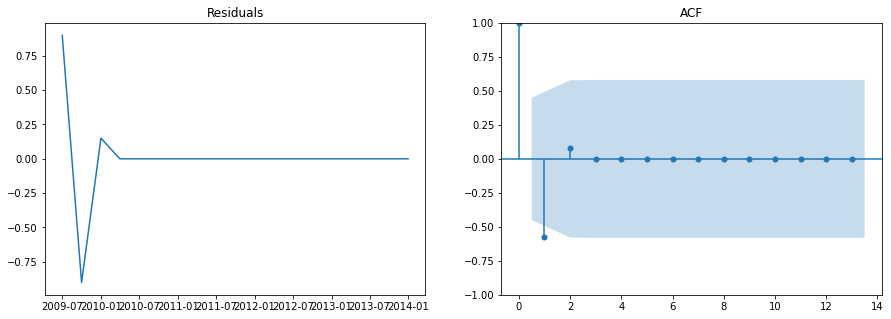


Test statistic for the residuals: -1.174
P-value for the residuals: 0.68487
The residuals are not stationary. We accept the hypothesis of a unit root.



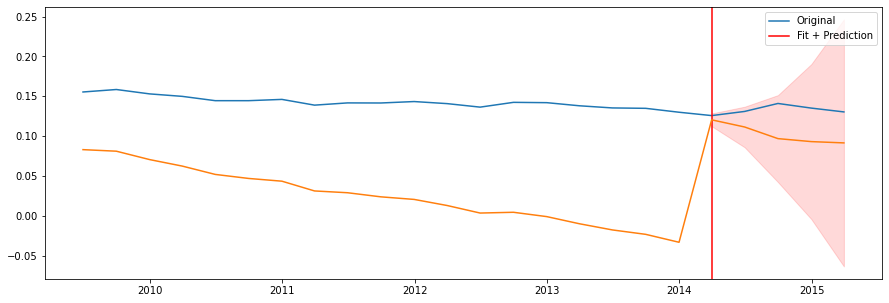

In [57]:
model = find_arimax_params(y_train,X_train)
plot_arimax_fit(model,y_train,y_test,X_train,X_test)

The best model is :

$$
ARIMA(0,1,0)
$$